In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [4]:
# --- 1. Load and Prepare the CIFAR-10 Dataset ---

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
# Normalize pixel values to be between 0 and 1
# Original images have pixel values from 0-255.
# We divide by 255.0 to make the model training more stable.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Define the 10 class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
# --- 2. Build the Model (CNN Architecture) ---

# We will use the Keras Sequential API, which is like stacking layers.
model = keras.Sequential()

In [8]:
# --- Data Augmentation Layers ---
# These layers "tweak" the training images (rotate, flip) to create
# more variety. This helps the model generalize better and prevents
# overfitting. This is a *crucial* step for good accuracy.
model.add(layers.Input(shape=(32, 32, 3))) # Input shape for CIFAR-10
model.add(layers.RandomFlip("horizontal"))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))

In [9]:
# --- Convolutional Base ---
# Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
# Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
# Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

In [12]:
# --- Classifier Head ---
# We flatten the 3D output from the conv layers into a 1D vector.
model.add(layers.Flatten())

In [13]:
# A 'Dense' layer is the classic "fully-connected" neural network layer.
model.add(layers.Dense(128, activation='relu'))

In [14]:
# Dropout randomly "turns off" 50% of neurons during training.
# This is another powerful technique to prevent overfitting.
model.add(layers.Dropout(0.5))

In [15]:
# The final output layer. It has 10 neurons (one for each class).
# 'softmax' converts the output into probabilities for each class.
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# Print a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# --- 3. Compile the Model ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# --- 4. Train the Model ---
# We train for 30 epochs. An 'epoch' is one full pass over the entire
# training dataset.
# 'history' will store the training accuracy and loss for each epoch.
print("Starting model training...")
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))

print("Model training finished.")

Starting model training...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.3723 - loss: 1.7137 - val_accuracy: 0.5093 - val_loss: 1.3589
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.4911 - loss: 1.4229 - val_accuracy: 0.5606 - val_loss: 1.2488
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5360 - loss: 1.3048 - val_accuracy: 0.6122 - val_loss: 1.0818
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5681 - loss: 1.2247 - val_accuracy: 0.6354 - val_loss: 1.0190
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5909 - loss: 1.1662 - val_accuracy: 0.6630 - val_loss: 0.9586
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6018 - loss: 1.1329 - val_accuracy: 0.6604 - val_loss: 0.9587
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6202 - loss: 1.0979 - val_accuracy: 0.6771 - val_loss: 0.9140
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42m

In [19]:
# --- 5. Evaluate the Model ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%") # Should be ~85%

313/313 - 3s - 8ms/step - accuracy: 0.6927 - loss: 0.8959

Test accuracy: 69.27%


In [20]:
# --- 6. Performance Visualization ---
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

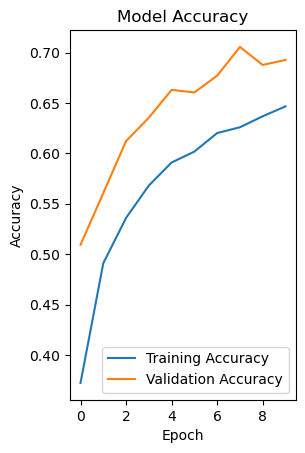

In [21]:
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

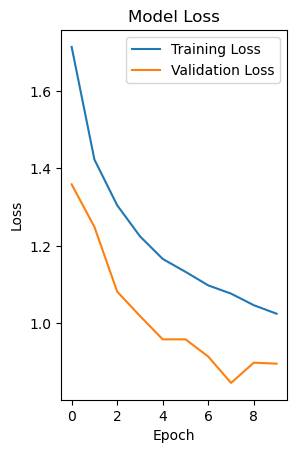

In [22]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [23]:
# Show the plots
plt.suptitle('Model Training Performance')
plt.tight_layout()
plt.show()

print("Script finished.")# Show the plots
plt.suptitle('Model Training Performance')
plt.tight_layout()
plt.show()

print("Script finished.")

<Figure size 640x480 with 0 Axes>

Script finished.


<Figure size 640x480 with 0 Axes>

Script finished.
